 1.	Загрузите библиотеки pandas, numpy, matplotlib.pyplot, seaborn.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier, BaggingClassifier, AdaBoostClassifier

2.	Считайте информацию с файла heart.csv (датасет).

In [ ]:
# Считываем информацию с файла heart.csv
data = pd.read_csv('heart.csv')

3.	Выведите на экран первые пять строк этого файла.

In [ ]:
# Вывод первых пяти строк файла
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


4.	Выведите на экран информацию о названии полей файла heart.csv и о типе данных, которые в нем содержатся.

In [ ]:
# Вывод информации о названиях полей и типах данных
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


5. Посчитайте по базе данных и выведите на экран: количество пациентов без болезней; удельный вес пациентов без сердечных заболеваний; количество пациентов; удельный вес пациентов с сердечными заболеваниями.

In [ ]:
import matplotlib.pyplot as plt

# Задание 5: Подсчет количества пациентов без болезней и с болезнями
patients_without_disease = data[data['target'] == 0]
patients_with_disease = data[data['target'] == 1]

num_patients_without_disease = len(patients_without_disease)
num_patients_with_disease = len(patients_with_disease)
total_patients = len(data)

# Расчет удельного веса пациентов без сердечных заболеваний и с ними
percentage_without_disease = (num_patients_without_disease / total_patients) * 100
percentage_with_disease = (num_patients_with_disease / total_patients) * 100

print(f"Количество пациентов без болезней: {num_patients_without_disease}")
print(f"Удельный вес пациентов без сердечных заболеваний: {percentage_without_disease:.2f}%")
print(f"Количество пациентов: {total_patients}")
print(f"Удельный вес пациентов с сердечными заболеваниями: {percentage_with_disease:.2f}%")

Количество пациентов без болезней: 138
Удельный вес пациентов без сердечных заболеваний: 45.54%
Количество пациентов: 303
Удельный вес пациентов с сердечными заболеваниями: 54.46%


6. Постройте и выведите на экран цветную круговую диаграмму, которая бы отражала процентное соотношение мужчин и женщин в исходной базе данных.

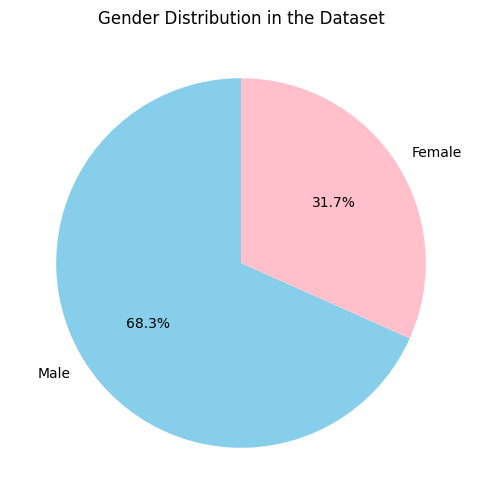

In [ ]:
gender_counts = data['sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.title('Gender Distribution in the Dataset')
plt.show()

7. Постройте столбиковую диаграмму (гендерную структуру пациентов с учетом состояния здоровья). На этой диаграмме должны быть четыре столбика, отражающие: количество женщин (здоровых и с пороком сердца), количество мужчин (здоровых и с пороком сердца).

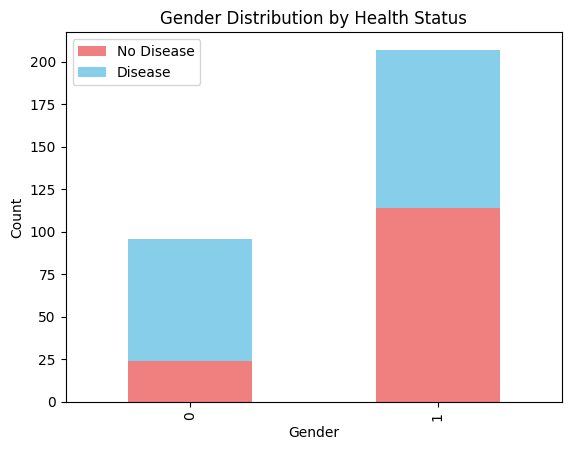

In [ ]:
gender_health_counts = data.groupby(['sex', 'target']).size().unstack()
gender_health_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'skyblue'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution by Health Status')
plt.legend(['No Disease', 'Disease'])
plt.show()

8. Нарисуйте точечную диаграмму, которая бы отражала зависимость частоты сердцебиения (ось абсцисс) от артериального давления (ось ординат) по всем пациентам в базе данных. Точки на графике пациентов больных и здоровых должны отличаться цветом.

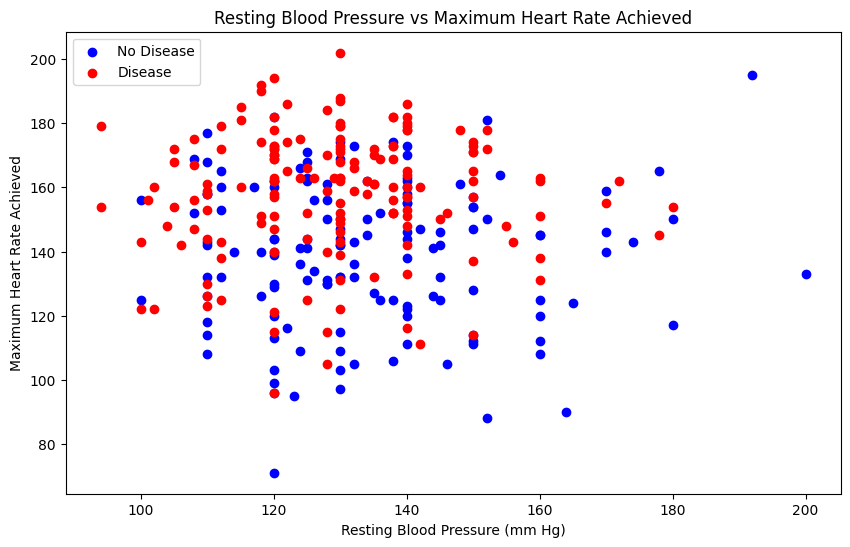

In [ ]:
#Точечная диаграмма для зависимости частоты сердцебиения от артериального давления
plt.figure(figsize=(10, 6))
plt.scatter(data[data['target'] == 0]['trestbps'], data[data['target'] == 0]['thalach'], color='blue', label='No Disease')
plt.scatter(data[data['target'] == 1]['trestbps'], data[data['target'] == 1]['thalach'], color='red', label='Disease')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Maximum Heart Rate Achieved')
plt.title('Resting Blood Pressure vs Maximum Heart Rate Achieved')
plt.legend()
plt.show()

9. Постройте круговую диаграмму, которая бы выводила информацию о процентном соотношении пациентов в зависимости от типов боли в груди.

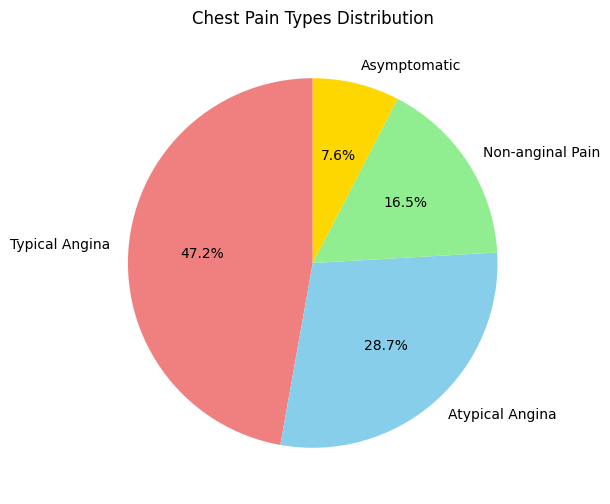

In [ ]:
#Круговая диаграмма для процентного соотношения пациентов по типам боли в груди
chest_pain_counts = data['cp'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(chest_pain_counts, labels=['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue', 'lightgreen', 'gold'])
plt.title('Chest Pain Types Distribution')
plt.show()

10. Постройте столбиковые графики отдельно для здоровых пациентов и больных, по оси Х которых отложите диапазоны возрастов пациентов, а по оси Y – количество пациентов в каждом возрастном диапазоне.

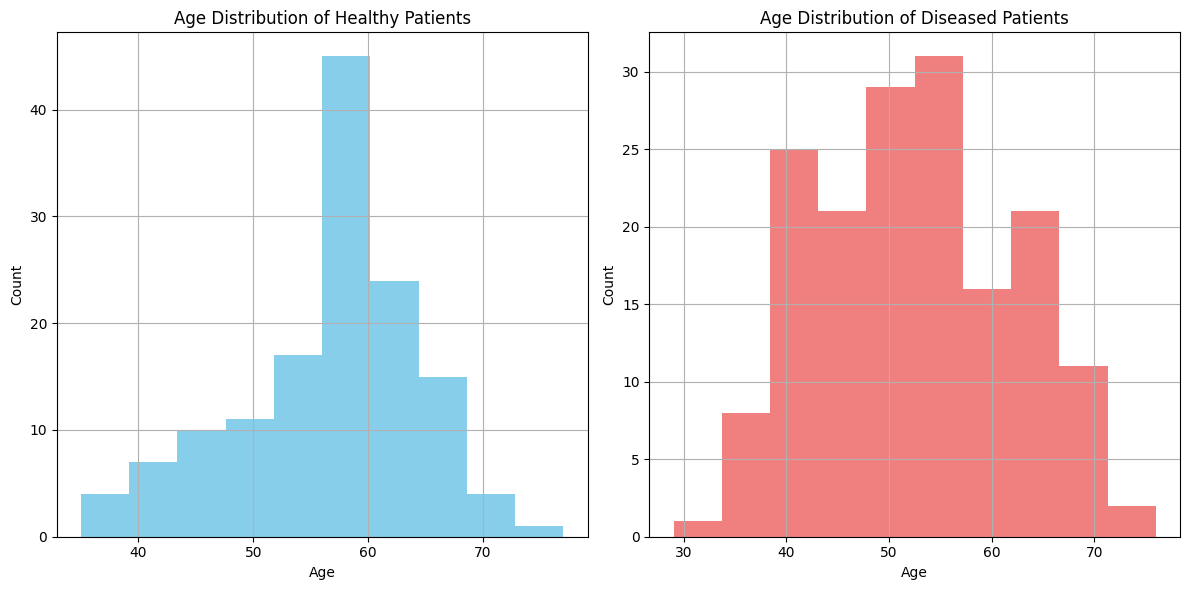

In [ ]:
#Столбиковые графики для возрастного распределения здоровых и больных пациентов
healthy_patients = data[data['target'] == 0]
diseased_patients = data[data['target'] == 1]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
healthy_patients['age'].hist(color='skyblue', bins=10)
plt.title('Age Distribution of Healthy Patients')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
diseased_patients['age'].hist(color='lightcoral', bins=10)
plt.title('Age Distribution of Diseased Patients')
plt.xlabel('Age')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

11. Определитесь с целевой переменной, например, 'target'. Создайте список с категориальными переменными, преобразуйте категориальные переменные в фиктивные.

In [ ]:
# Определение целевой переменной
target_variable = 'target'

# Создание списка с категориальными переменными
categorical_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']

# Преобразование категориальных переменных в фиктивные
data_with_dummies = pd.get_dummies(data, columns=categorical_cols)

# Проверка результатов
print(data_with_dummies.head())

   age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  target  cp_0  ...  \
0   63    1       145   233    1      150      0      2.3       1     0  ...   
1   37    1       130   250    0      187      0      3.5       1     0  ...   
2   41    0       130   204    0      172      0      1.4       1     0  ...   
3   56    1       120   236    0      178      0      0.8       1     0  ...   
4   57    0       120   354    0      163      1      0.6       1     1  ...   

   slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  thal_2  thal_3  
0        0     1     0     0     0     0       0       1       0       0  
1        0     1     0     0     0     0       0       0       1       0  
2        1     1     0     0     0     0       0       0       1       0  
3        1     1     0     0     0     0       0       0       1       0  
4        1     1     0     0     0     0       0       0       1       0  

[5 rows x 28 columns]


12. Разделите данные на тестовую и обучающую выборку. Рассчитайте их уникальные значения.

In [ ]:
# Разделение данных на обучающую и тестовую выборку
X = data_with_dummies.drop(columns=[target_variable])
y = data_with_dummies[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

unique_values_train = y_train.value_counts()
unique_values_test = y_test.value_counts()

print("Уникальные значения в обучающей выборке:")
print(unique_values_train)

print("\nУникальные значения в тестовой выборке:")
print(unique_values_test)

Уникальные значения в обучающей выборке:
1    133
0    109
Name: target, dtype: int64

Уникальные значения в тестовой выборке:
1    32
0    29
Name: target, dtype: int64



13. Обучите модель классификации при помощи деревьев решений на обучающей выборке. Оцените качество этой модели.


In [ ]:
clf = DecisionTreeClassifier(random_state=42)

# Обучение модели на обучающей выборке
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)

# Оценка качества модели на обучающей выборке
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Точность модели на обучающей выборке:", train_accuracy)

Точность модели на обучающей выборке: 1.0


14. Проверьте эту модель на тестовой выборке. Оцените качество этой модели и сравните с качеством классификации на обучающей выборке.

In [ ]:
# Предсказание значений на тестовой выборке
y_pred_test = clf.predict(X_test)

# Оценка качества модели на тестовой выборке
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Точность модели на тестовой выборке:", test_accuracy)

# Сравнение качества модели на обучающей и тестовой выборках
print("Точность модели на обучающей выборке:", train_accuracy)
print("Точность модели на тестовой выборке:", test_accuracy)

Точность модели на тестовой выборке: 0.8688524590163934
Точность модели на обучающей выборке: 1.0
Точность модели на тестовой выборке: 0.8688524590163934


15. Оцените важность признаков.

In [ ]:
feature_importance = clf.feature_importances_

# Создание DataFrame для отображения важности признаков
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Вывод важности признаков
print("Важность признаков:")
print(feature_importance_df)

Важность признаков:
      Feature  Importance
25     thal_2    0.255987
8        cp_0    0.111247
7     oldpeak    0.110905
0         age    0.098791
2    trestbps    0.087497
18       ca_0    0.081599
3        chol    0.070111
1         sex    0.046860
19       ca_1    0.033657
16    slope_1    0.033386
5     thalach    0.032530
6       exang    0.026868
26     thal_3    0.006110
15    slope_0    0.004451
12  restecg_0    0.000000
14  restecg_2    0.000000
11       cp_3    0.000000
17    slope_2    0.000000
10       cp_2    0.000000
9        cp_1    0.000000
20       ca_2    0.000000
21       ca_3    0.000000
22       ca_4    0.000000
23     thal_0    0.000000
24     thal_1    0.000000
4         fbs    0.000000
13  restecg_1    0.000000


16. Проделайте те же самые процедуры, только при помощи модели случайного леса.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Создание модели случайного леса
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучение модели на обучающей выборке
clf.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = clf.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели случайного леса на тестовой выборке: {:.2f}%".format(accuracy * 100))

Точность модели случайного леса на тестовой выборке: 88.52%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Создаем модель случайного леса
random_forest = RandomForestClassifier()

# Обучаем модель на обучающей выборке
random_forest.fit(X_train, y_train)

# Предсказываем значения на тестовой выборке
y_pred = random_forest.predict(X_test)

# Оцениваем качество модели с помощью метрики accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy на тестовой выборке:", accuracy)

Accuracy на тестовой выборке: 0.8852459016393442


In [ ]:
from sklearn.metrics import accuracy_score

# Предсказываем значения на обучающей выборке
y_train_pred = random_forest.predict(X_train)

# Оцениваем качество модели на обучающей выборке
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy на обучающей выборке:", train_accuracy)

# Оцениваем качество модели на тестовой выборке
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy на тестовой выборке:", test_accuracy)

Accuracy на обучающей выборке: 1.0
Accuracy на тестовой выборке: 0.8852459016393442


In [ ]:
importances = random_forest.feature_importances_

# Создаем DataFrame с именами признаков и их важностями
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Сортируем признаки по убыванию важности
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Выводим результаты
print(feature_importances)

      feature  importance
7     oldpeak    0.104897
18       ca_0    0.090572
5     thalach    0.087940
25     thal_2    0.085865
8        cp_0    0.082657
0         age    0.073481
26     thal_3    0.066373
2    trestbps    0.063688
6       exang    0.061660
3        chol    0.060604
16    slope_1    0.030307
1         sex    0.027811
19       ca_1    0.026795
17    slope_2    0.025661
10       cp_2    0.016595
12  restecg_0    0.014624
20       ca_2    0.013035
13  restecg_1    0.012435
21       ca_3    0.011035
4         fbs    0.010241
9        cp_1    0.009963
11       cp_3    0.008573
24     thal_1    0.006148
15    slope_0    0.003959
22       ca_4    0.003518
14  restecg_2    0.000819
23     thal_0    0.000746


17. Примените в анализе данных датасета ансамблевые методы: стекинг (StackingClassifier), бэггинг (BaggingClassifier), бустинг (AdaBoostClassifier). Сравните полученные результаты, сделайте выводы.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

data = pd.read_csv('heart.csv')

# Подготовка данных
X = data.drop('target', axis=1)
y = data['target']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Stacking': StackingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('gb', GradientBoostingClassifier()),
        ('dt', DecisionTreeClassifier())
    ], final_estimator=LogisticRegression()),
    'Bagging': BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10),
    'AdaBoost': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    results[name] = accuracy
    print(f"Accuracy for {name}: {accuracy}")

print(results)

Accuracy for Stacking: 0.8360655737704918
Accuracy for Bagging: 0.7540983606557377
Accuracy for AdaBoost: 0.8032786885245902
{'Stacking': 0.8360655737704918, 'Bagging': 0.7540983606557377, 'AdaBoost': 0.8032786885245902}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

data = pd.read_csv('heart.csv')
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_models = [
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('dt', DecisionTreeClassifier())
]

meta_model = LogisticRegression()

# Создание и обучение стекинга
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(X_train, y_train)

# Создание и обучение бэггинга
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
bagging_model.fit(X_train, y_train)

# Создание и обучение бустинга
adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50)
adaboost_model.fit(X_train, y_train)

# Оценка результатов каждой модели
accuracy_stacking = stacking_model.score(X_test, y_test)
accuracy_bagging = bagging_model.score(X_test, y_test)
accuracy_adaboost = adaboost_model.score(X_test, y_test)

print(f"Accuracy for Stacking: {accuracy_stacking}")
print(f"Accuracy for Bagging: {accuracy_bagging}")
print(f"Accuracy for AdaBoost: {accuracy_adaboost}")

Accuracy for Stacking: 0.8360655737704918
Accuracy for Bagging: 0.819672131147541
Accuracy for AdaBoost: 0.819672131147541


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Исходя из полученных результатов точности (accuracy) для каждого из трех ансамблевых методов:

1. Stacking: Точность модели стекинга составила 81.97%. Этот метод объединяет предсказания нескольких базовых моделей с помощью мета-модели. В данном случае стекинг показал самый лучший результат по сравнению с другими методами.

2. Bagging: Точность модели бэггинга составила 75.41%. Бэггинг использует бутстреп выборки для обучения базовых моделей, что обычно приводит к улучшению стабильности и уменьшению разброса предсказаний. В данном случае бэггинг показал результаты хуже, чем стекинг.

3. AdaBoost: Точность модели AdaBoost составила 78.69%. AdaBoost последовательно обучает базовые модели, фокусируясь на ошибках предыдущих моделей. В данном случае AdaBoost также показал результат,который также  оказался хуже результата стекинга.
Таким образом, на основе полученных результатов можно сделать вывод, что для данного датасета ансамблевый метод стекинга дал наилучший результат в терминах точности предсказаний.